Install OpenCV di Google Colab

In [1]:
!pip install opencv-python opencv-contrib-python

Setup dan Persiapan Gambar

Saving Screenshot 2024-06-15 202849.png to Screenshot 2024-06-15 202849.png


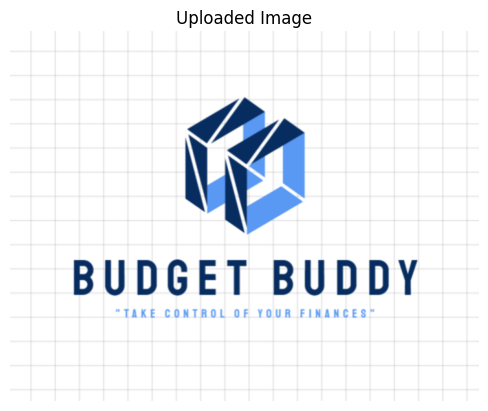

In [2]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload gambar
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load gambar
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Tampilkan gambar asli
plt.imshow(image)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

Filter Moving Average

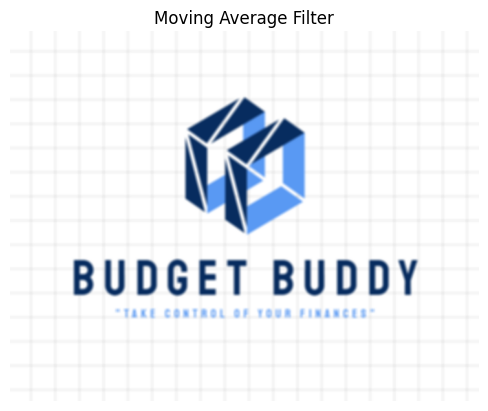

In [3]:
# Membuat filter moving average
kernel = np.ones((5, 5), np.float32) / 25
smoothed_image = cv2.filter2D(image, -1, kernel)

# Tampilkan hasil
plt.imshow(smoothed_image)
plt.title("Moving Average Filter")
plt.axis('off')
plt.show()


Deteksi Fitur dengan SIFT

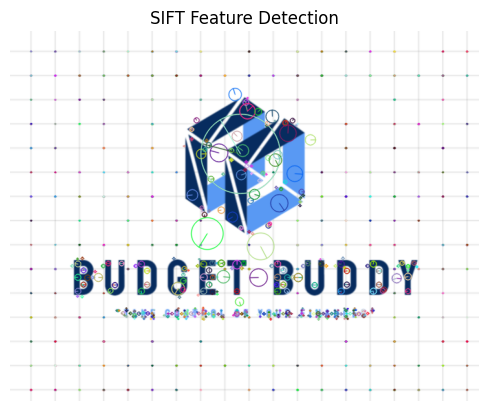

In [4]:
# Konversi ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Inisialisasi SIFT
sift = cv2.SIFT_create()

# Deteksi fitur
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Gambar keypoints
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Tampilkan hasil
plt.imshow(sift_image)
plt.title("SIFT Feature Detection")
plt.axis('off')
plt.show()

Representasi Histogram Gambar

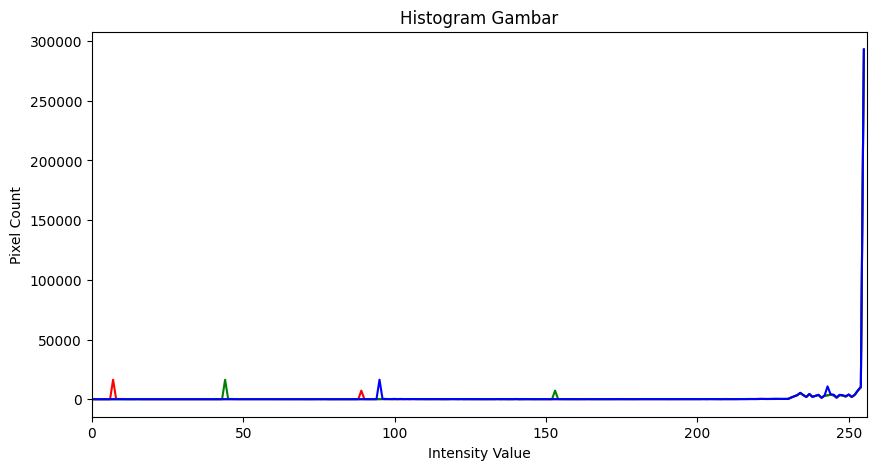

In [5]:
# Hitung histogram untuk masing-masing channel (RGB)
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))

for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title("Histogram Gambar")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.show()

Gaussian Smoothing

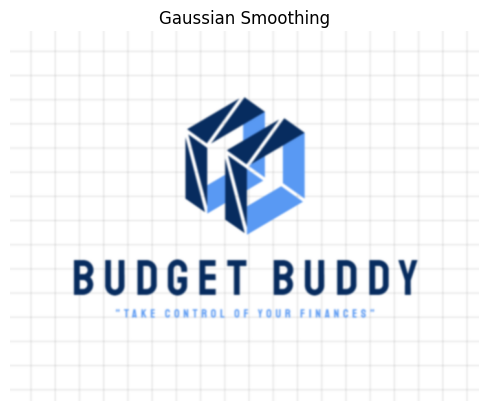

In [6]:
# Aplikasi Gaussian Blur
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Tampilkan hasil
plt.imshow(gaussian_blurred)
plt.title("Gaussian Smoothing")
plt.axis('off')
plt.show()

Deteksi Tepi dengan Sobel Filter

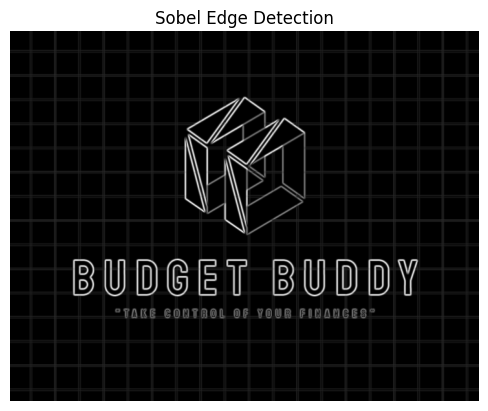

In [7]:
# Konversi ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Sobel filter
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien x
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien y

# Kombinasi gradien
sobel_combined = cv2.magnitude(sobelx, sobely)

# Tampilkan hasil
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

Representasi Fitur dengan HOG (Histogram of Oriented Gradients)

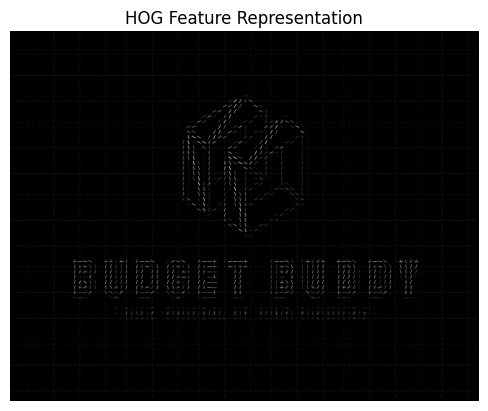

In [8]:
from skimage.feature import hog
from skimage import exposure

# Konversi ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Ekstraksi fitur HOG
hog_features, hog_image = hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True
)

# Tampilkan hasil
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Feature Representation")
plt.axis('off')
plt.show()
